# **Analysis of Ramen Ratings in different countries.**
#### The **scope** of this project involves using Python libraries and packages for: data pre-processing, data cleaning/wrangling and data visualizations. 
#### The **purpose** of this project was to practice automation skills to iterate and create multiple graphs. 
#### The **impact** this project has can be seen as a guide or referenece to beginner data analysts/ programmers who wish to speed up their production through automation.

# **Introduction: Breaking things down**
#### Before we focus on automating a big task.(Unless youre an experienced programmer) It always helps to simplify the problem and build things up instead of tackling it all at once.

# Data Pre-processing

In [1]:
#load in the neccessary library/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load in the data
data = pd.read_csv("../input/ramen-ratings-dataset/ramen-ratings.csv")

#Display first 5 rows of the data.
data.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [2]:
#checks the shape of the data
data.shape

(2580, 7)

#### NOTE: In this next line we see that the only numerical value column is the Review #. It's important to note Stars column is not numerical when we might expectit to be. You'll find this especially important when we try to do numerical calculations later on.

In [3]:
#Runs a summary of all numerical values. 
data.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [4]:
#finds the number of missing values in each column
data.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [5]:
#finds which countries are represented in the data
data['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [6]:
#checks how many unique Styles there are. About 7-8 if we include the nan.
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

# Data Cleaning

In [7]:
# This finds that there were 3 'Unrated' values that were in the data. This is important because then
# we wouldnt be able to convert them from 'object' to float values.
data.Stars.value_counts()


# We can just drop this value using indexing
data.drop(data.loc[data['Stars']=='Unrated'].index, inplace=True)

# Turning the Stars column values into a numeric datatypes. i.e. object -> float
numeric_Stars = pd.to_numeric(data.Stars)
data.Stars = numeric_Stars

In [8]:
#Creates a sub dataset based on cup ramen in japan.
japan_cup_data = data[(data.Style == 'Cup') & (data.Country == 'Japan')]
japan_cup_data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,NaN
112,2468,Acecook,Dossari Yasai Chanpon,Cup,Japan,4.25,NaN
147,2433,Nissin,Cup Noodles Indonesia Mie Goreng,Cup,Japan,3.75,NaN
151,2429,New Touch,T's Restaurant Sura Tanmen,Cup,Japan,4.00,NaN
209,2371,Daikoku,Tanuki Soba,Cup,Japan,3.50,NaN
221,2359,Daikoku,Kitsune Udon,Cup,Japan,2.00,NaN
227,2353,Nissin,"Cup Noodles Rich Garlic, Egg Yolk & Oxtail",Cup,Japan,4.00,NaN
260,2320,Nissin,Nupasta Bolognese Flavour Instant Noodle,Cup,Japan,4.00,NaN
264,2316,Nissin,Cup Noodle Spicy Curry Chicken,Cup,Japan,5.00,NaN


In [9]:
#Groups and calculates the average ratings based on brand
japan_cup_brand_average_rating = japan_cup_data.groupby('Brand').Stars.mean()
japan_cup_brand_average_rating 

Brand
Acecook            3.583333
Daikoku            2.750000
Maruchan           0.000000
New Touch          3.875000
Nissin             4.268750
Paldo              3.250000
Samyang Foods      3.250000
Sapporo Ichiban    3.750000
Seven-Eleven       4.500000
Name: Stars, dtype: float64

In [10]:
#sorts the unique brand names from the Brand column
sorted_brand_names = sorted(pd.Series(japan_cup_data.Brand.unique()))
sorted_brand_names

['Acecook',
 'Daikoku',
 'Maruchan',
 'New Touch',
 'Nissin',
 'Paldo',
 'Samyang Foods',
 'Sapporo Ichiban',
 'Seven-Eleven']

# Data Visualization

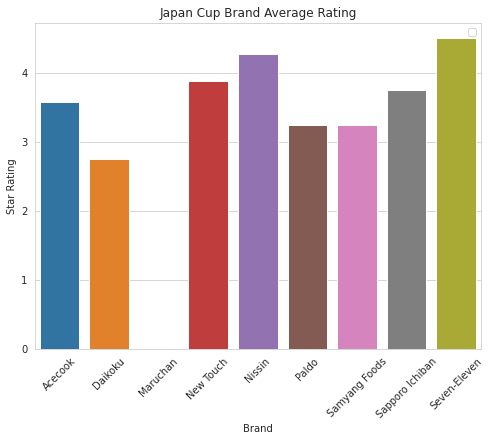

In [11]:
#Creates barplot for Average Star ratings for Japan Cup Ramen based on Brand

sns.set_style("whitegrid") # "darkgrid", "whitegrid", "dark", "white", "ticks"
plt.figure(figsize = (8,6))
plt.title("Japan Cup Brand Average Rating", fontsize = 12)
sns.barplot(x = sorted_brand_names, y = japan_cup_brand_average_rating)
plt.xlabel("Brand")
plt.ylabel("Star Rating")

plt.xticks(rotation = 45)
plt.legend()

plt.show()

# Something Extra:
#### In general pie charts arent used as often but for simplicity we will use it here to visually see the percentages of how many brands went into calculating each average star rating.
#### In these last two lines, we see the brand Nissan has thirty-two different cup ramen in comparison to the brand Seven-Eleven which has only one. From this analysis we can say Seven-Eleven has one really good cup ramen that scored really well however Nissan is second best and has a lot of variety!

In [12]:
#Shows the variety of cup ramen by each brand. 
#This shows Nissin has 32 cup ramen that were used when calculating the averages.
brand_count = japan_cup_data.groupby('Brand').Brand.count()
brand_count

Brand
Acecook             6
Daikoku             2
Maruchan            1
New Touch           2
Nissin             32
Paldo               1
Samyang Foods       2
Sapporo Ichiban     2
Seven-Eleven        1
Name: Brand, dtype: int64

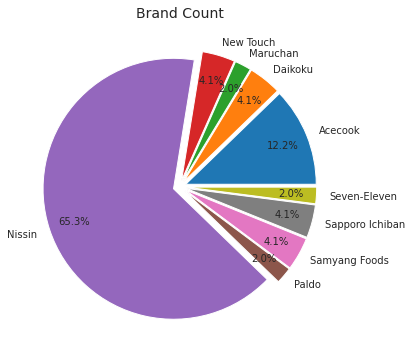

In [13]:
#Using matplotlib to display a pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = sorted_brand_names
plt.pie(x= brand_count, autopct="%.1f%%", explode = [0.05]*9, labels=labels, pctdistance=0.8)
plt.title("Brand Count", fontsize=14);

# Starting 'Fresh' and Automating multiple graphs.
#### We have successfully plotted one barplot for one country and one type of style of ramen. Using similar commands and modifying it a bit we can automate it to construct multiple graphs.

In [14]:
#load in the neccessary library/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#loads in the data
data = pd.read_csv("../input/ramen-ratings-dataset/ramen-ratings.csv")

In [15]:
#declare any global variables that will be used.

list_of_countries = data['Country'].unique()
list_of_styles = data['Style'].unique()  

In [16]:
# Cleans the data by: dropping 'unrated' values and 
# changing object values to numerical ones in the Stars column.

def data_wrangling():
    data.drop(data.loc[data['Stars']=='Unrated'].index, inplace=True)
    numeric_Stars = pd.to_numeric(data.Stars)
    data.Stars = numeric_Stars

In [17]:
#Plots a Graph    
def graph(country_name, style_name, x_values, y_values ):
    
    
    sns.set_style("whitegrid") # "darkgrid", "whitegrid", "dark", "white", "ticks"
    plt.figure(figsize = (8,6))
    plt.title("{}'s Average Star Rating of {} Ramen".format(country_name,style_name), fontsize = 12)
    sns.barplot(x = x_values, y = y_values)
    plt.xlabel("Brand")
    plt.ylabel("Star Rating")

    plt.xticks(rotation = 60)
    plt.legend()
    
    plt.show()

#### It's important to note that some countries do not have ramen in a specific style. i.e. Japan does not have 'Can' style ramen. This error was fixed using an if statment to check if the length of the brand names was greater than zero. If there was at least one brand, it would print a graph. If not, it would simply pass to iterate again. 

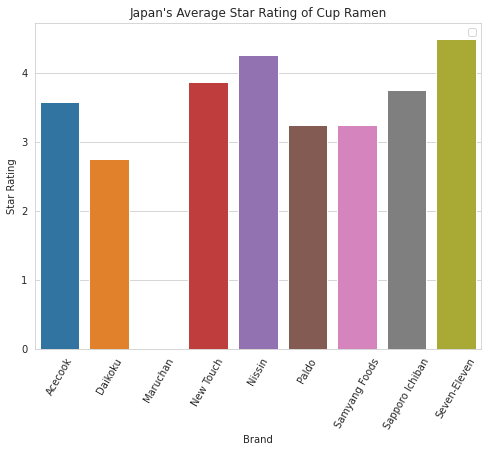

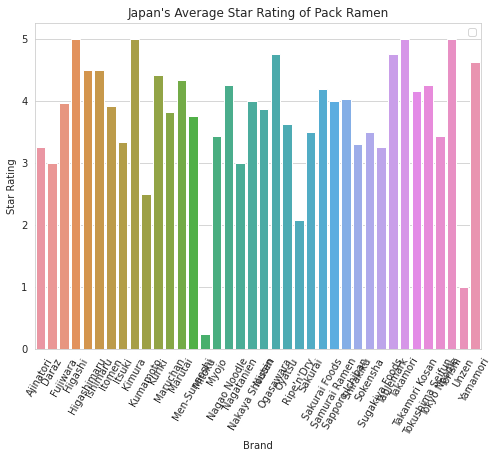

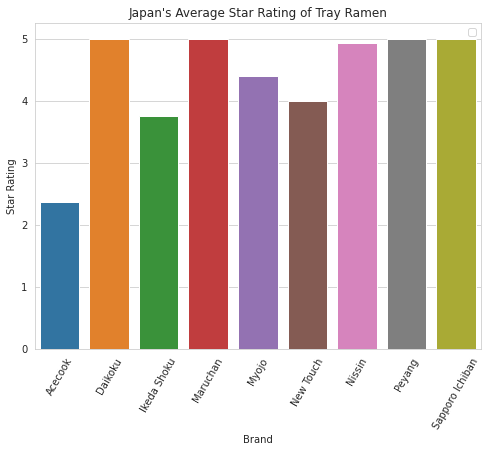

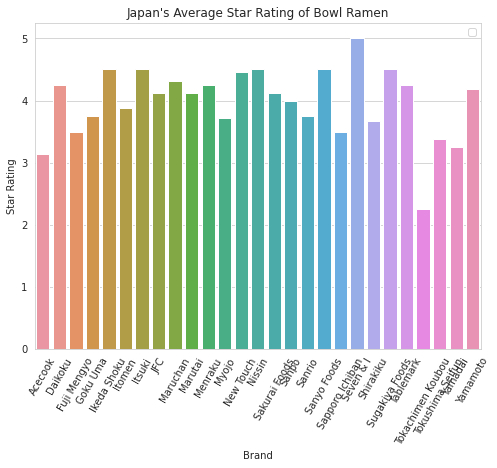

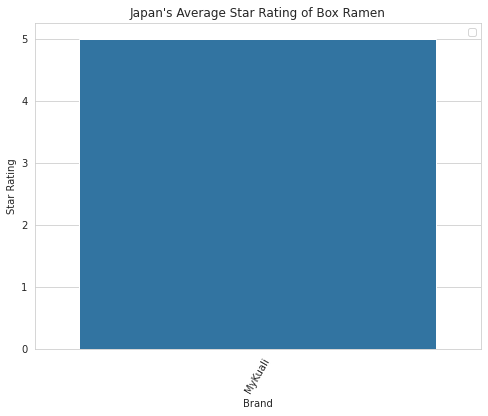

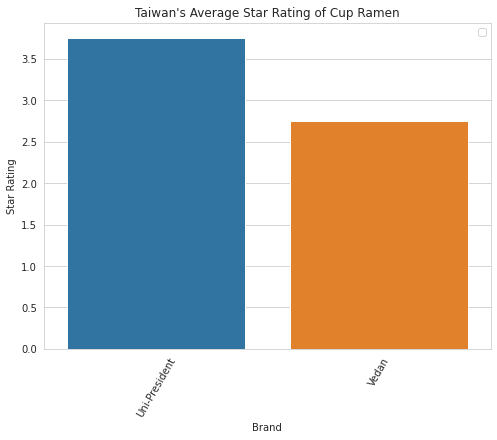

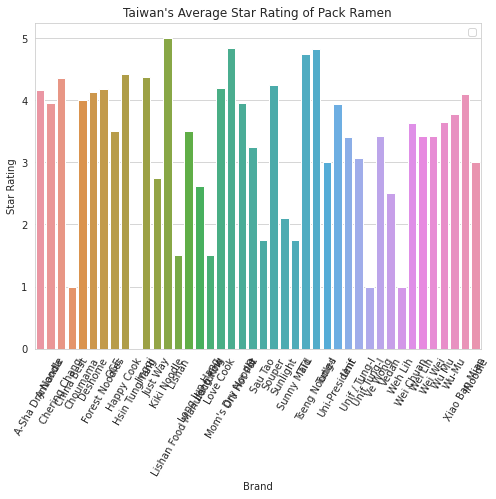

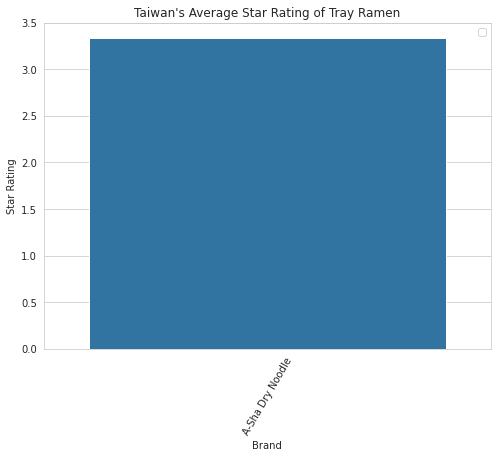

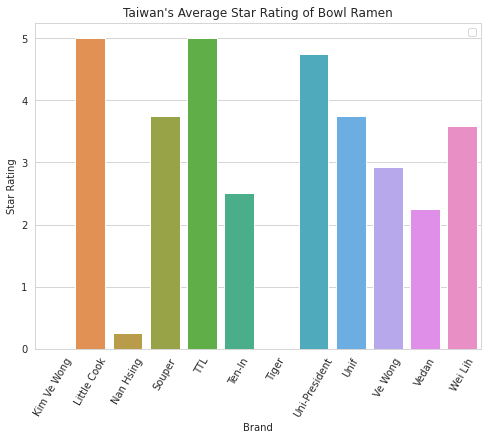

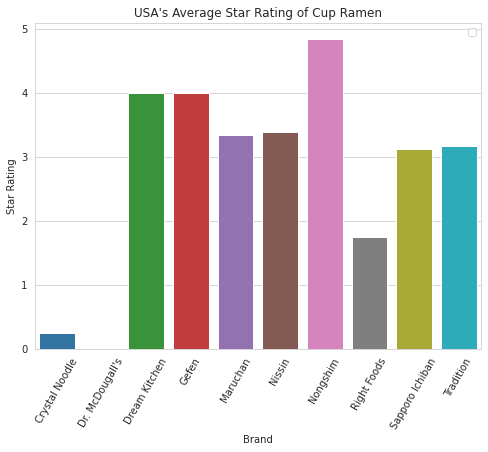

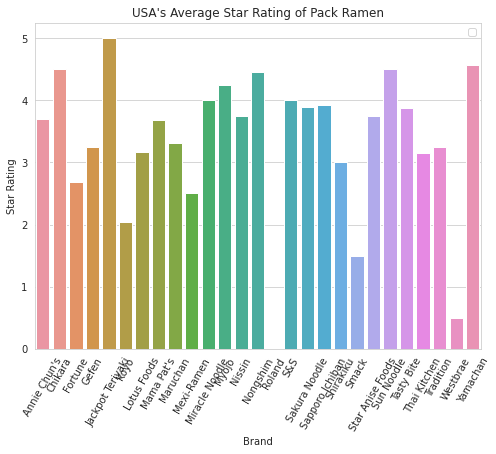

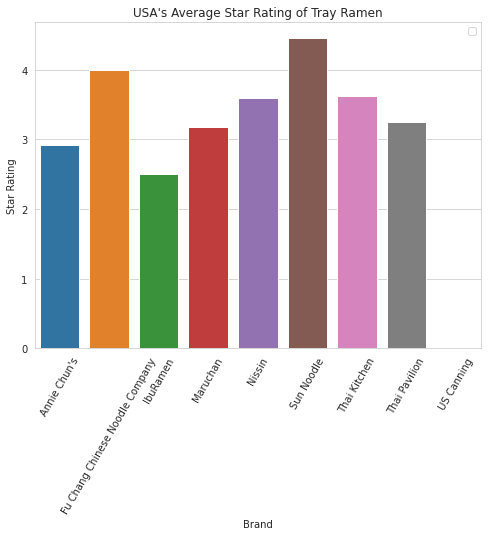

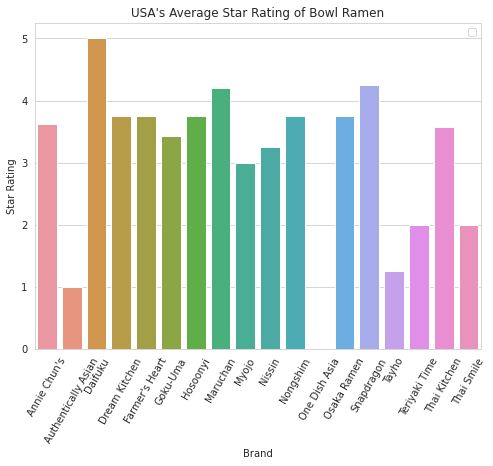

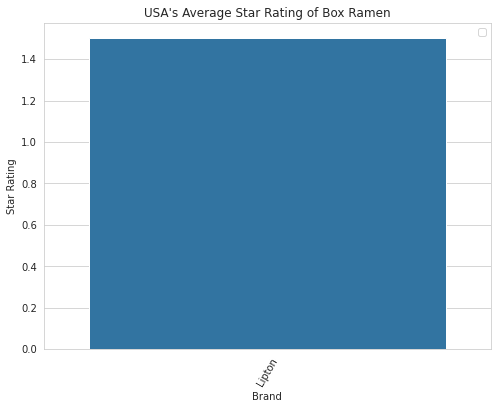

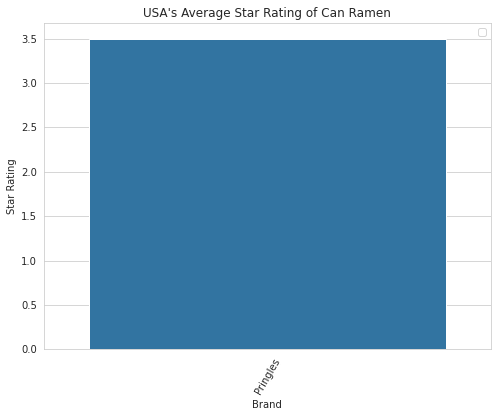

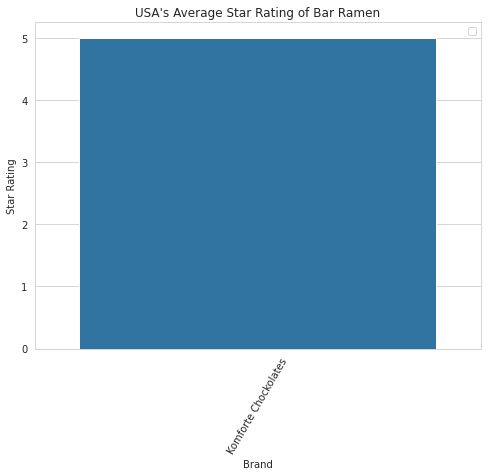

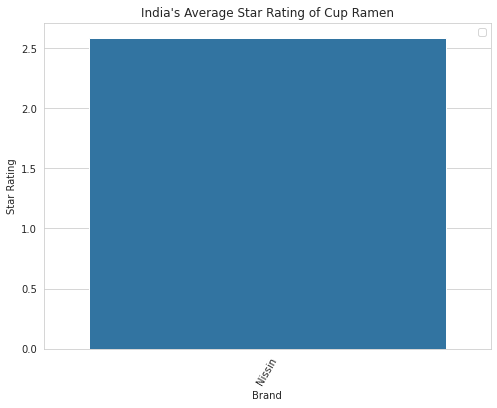

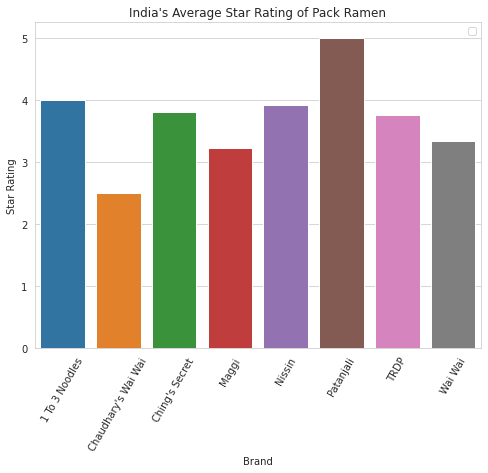

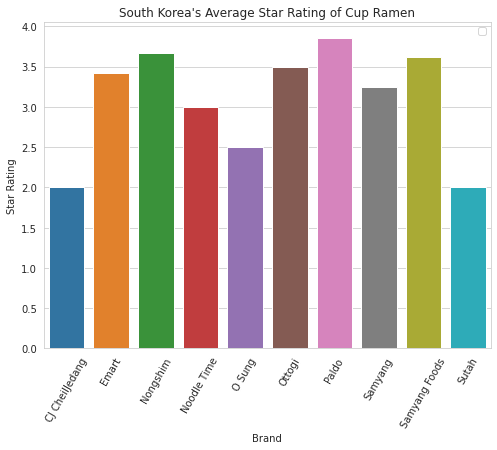

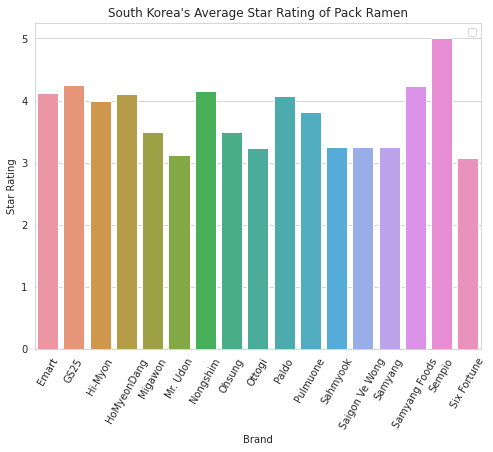

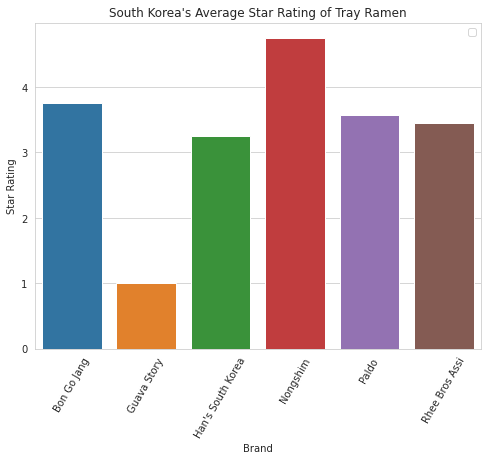

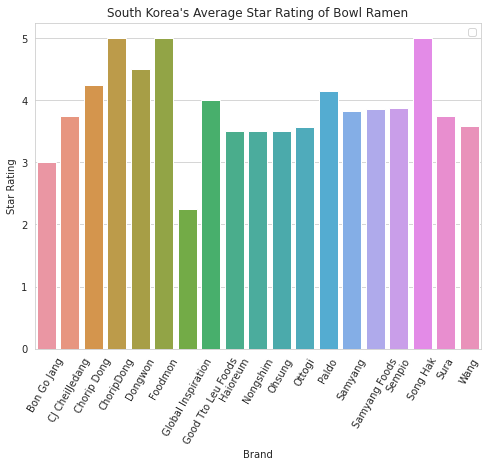

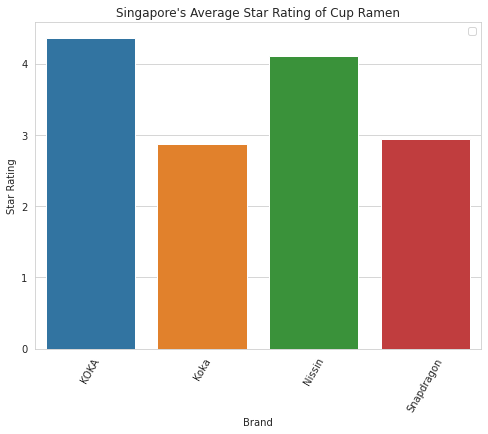

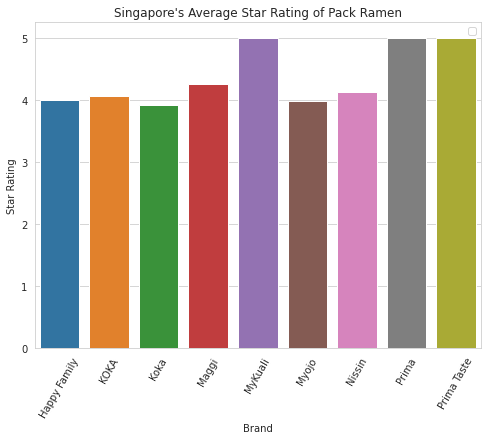

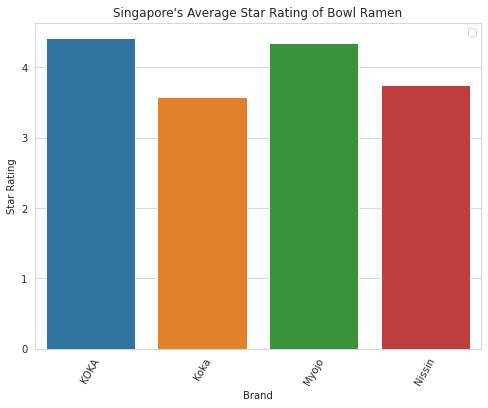

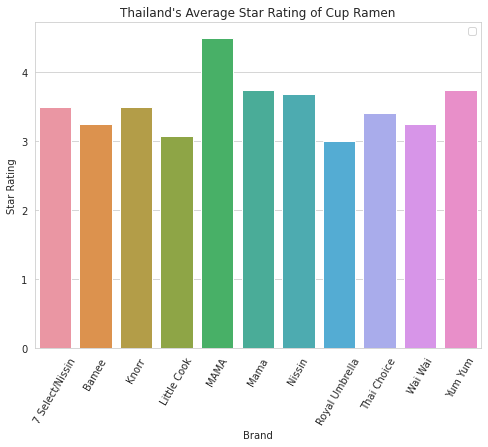

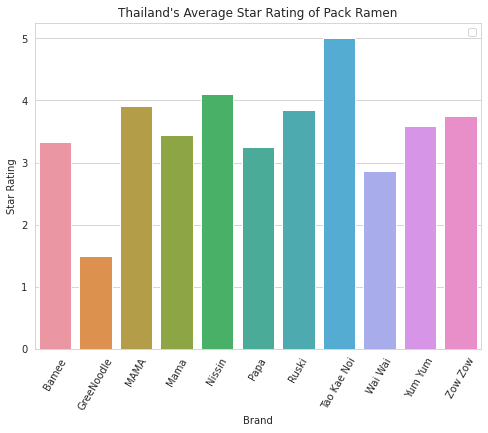

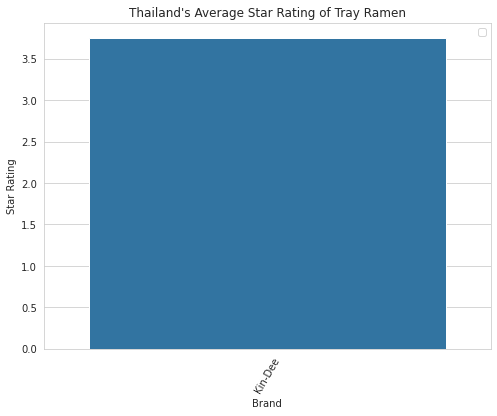

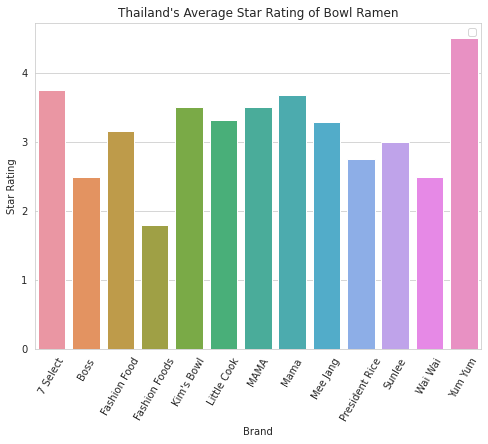

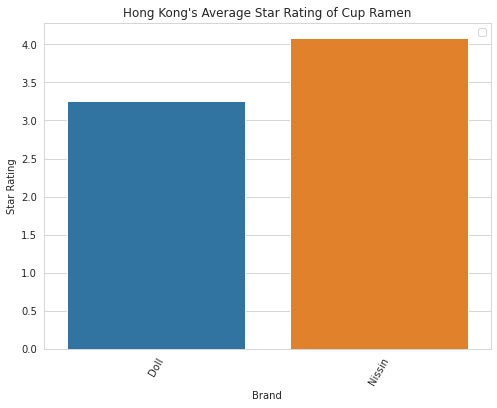

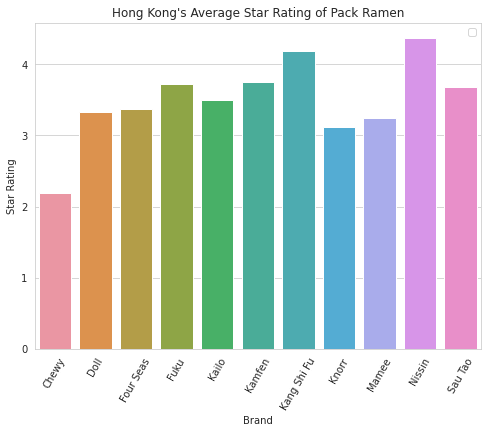

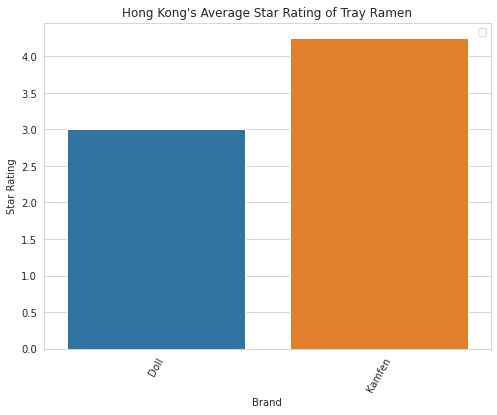

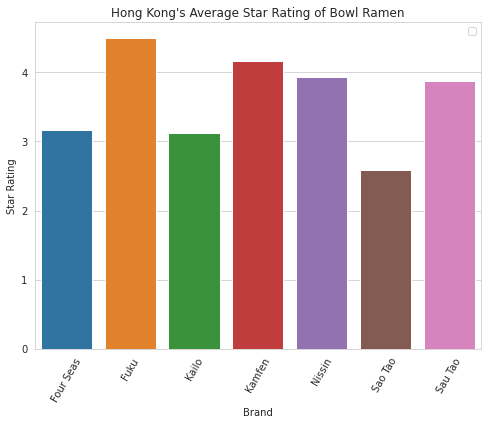

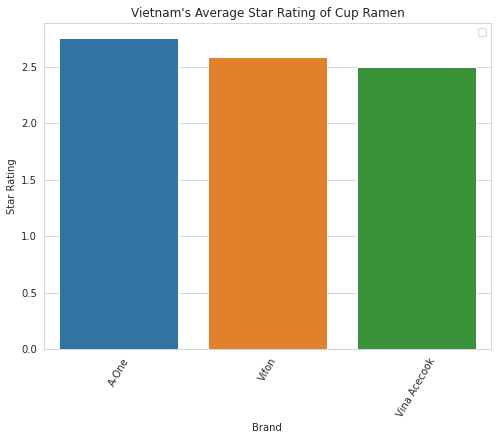

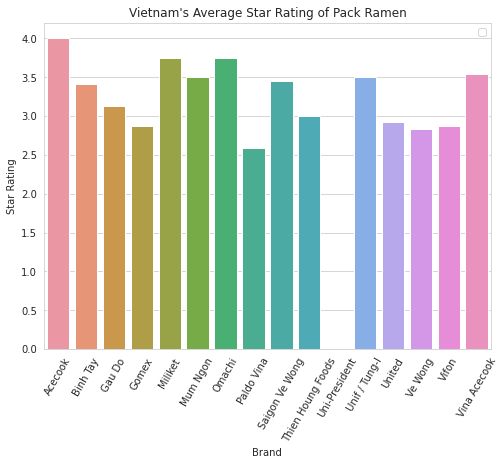

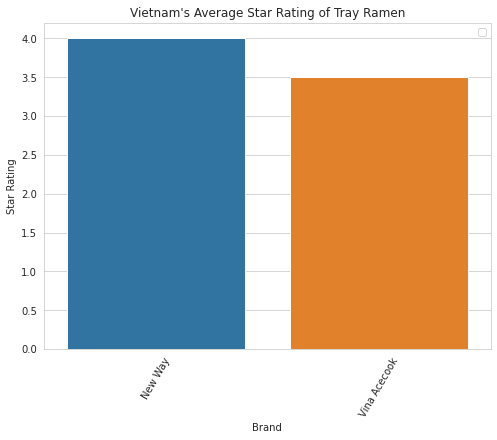

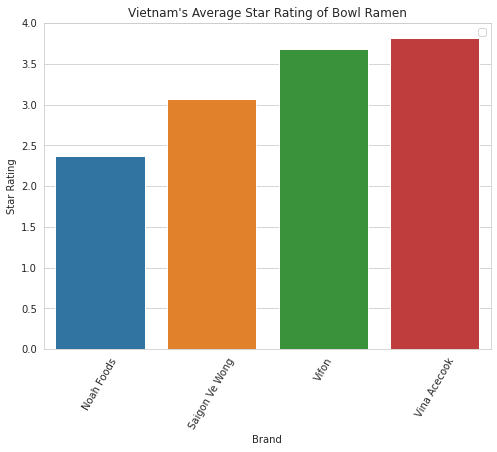

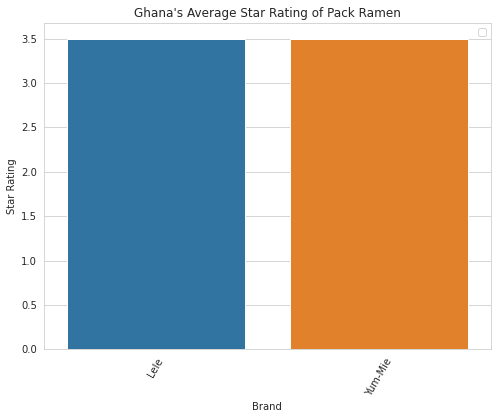

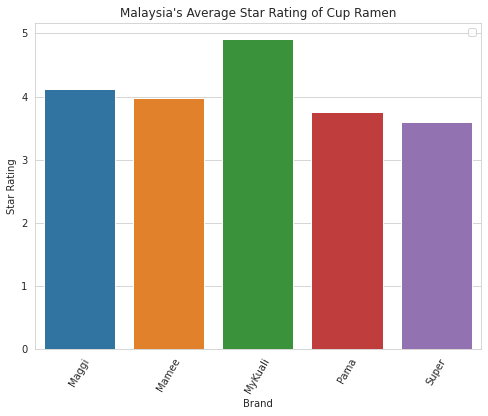

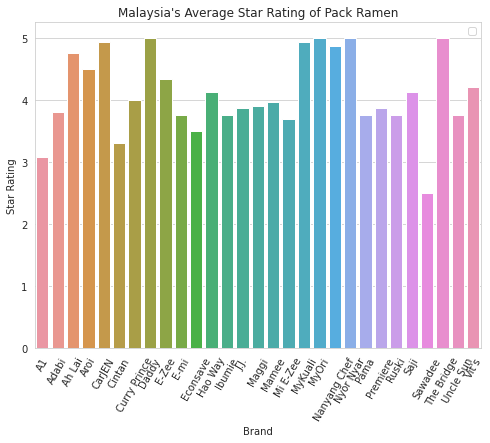

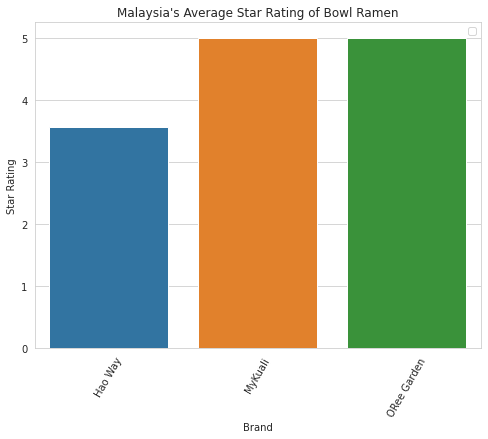

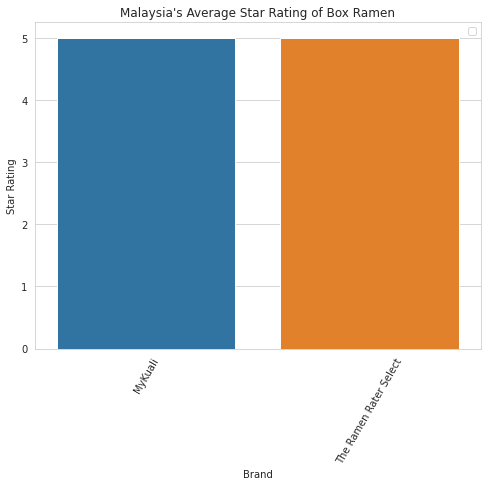

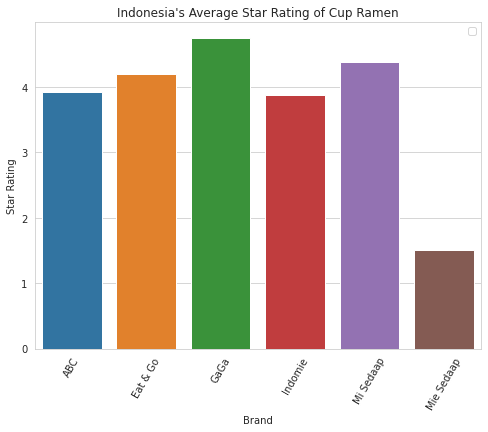

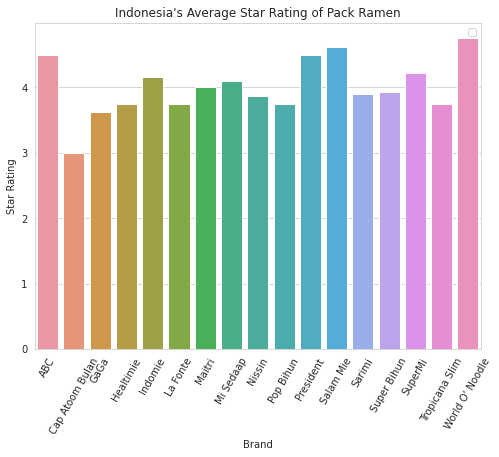

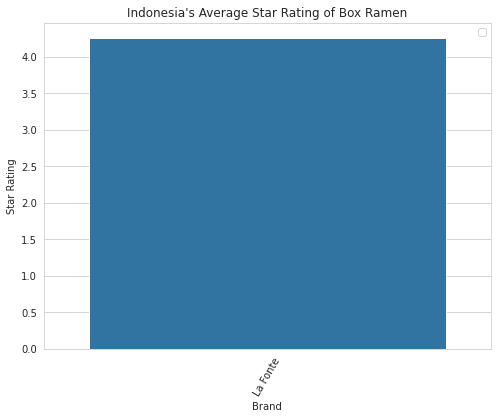

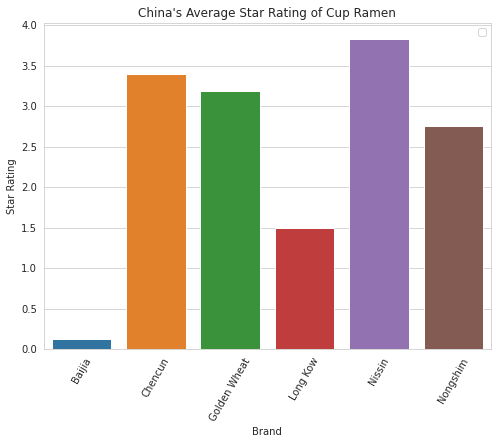

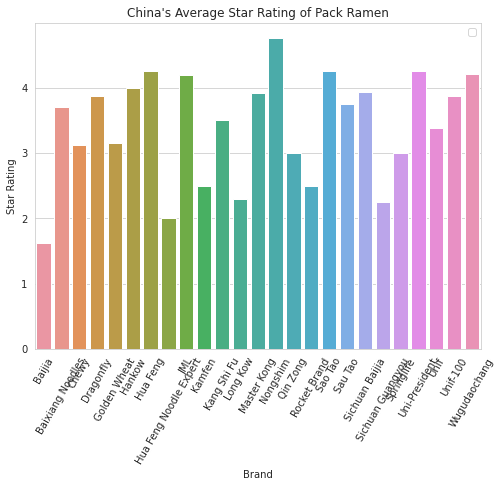

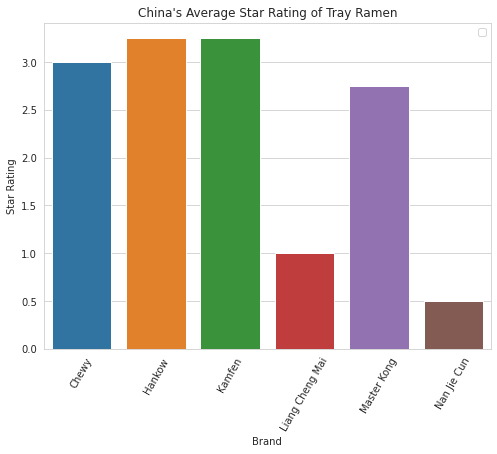

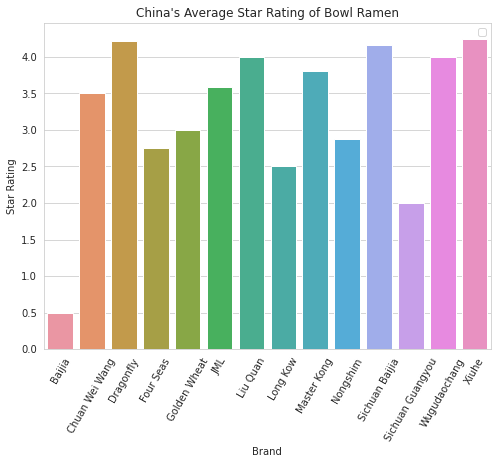

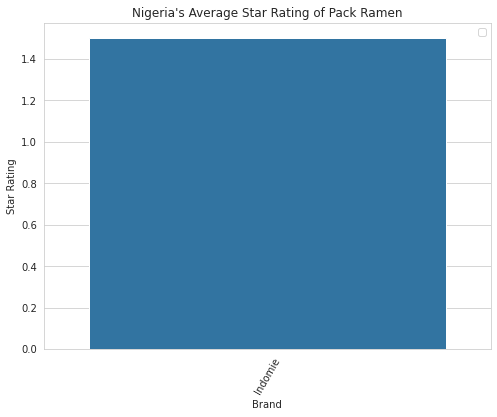

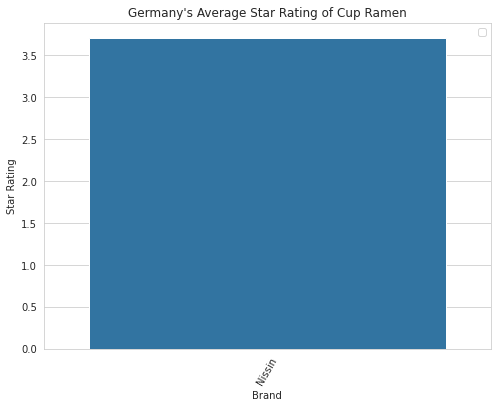

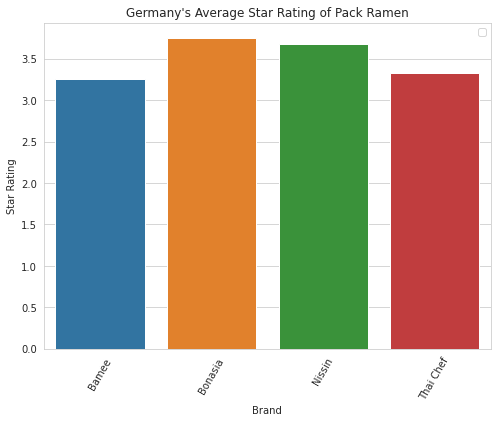

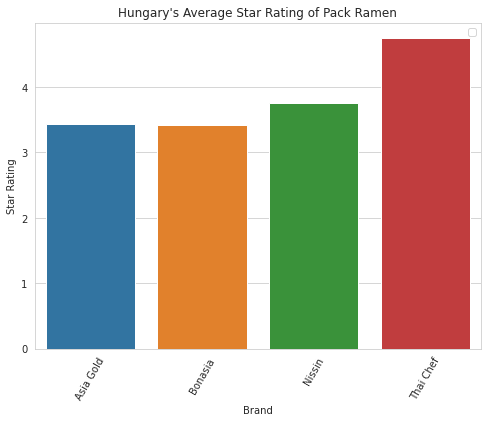

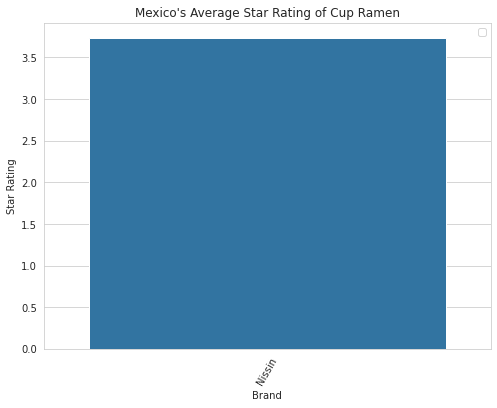

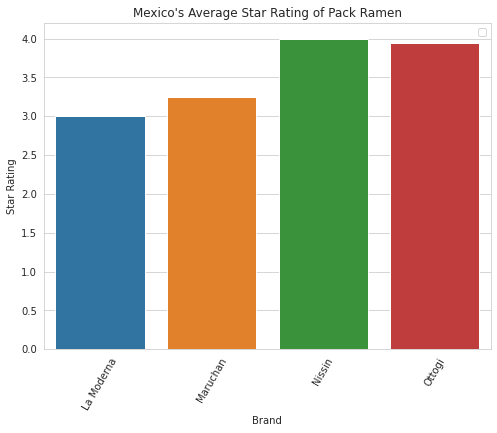

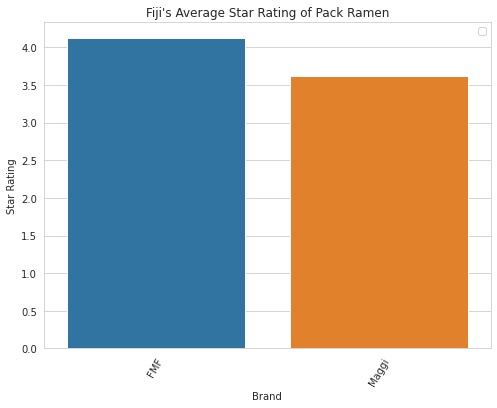

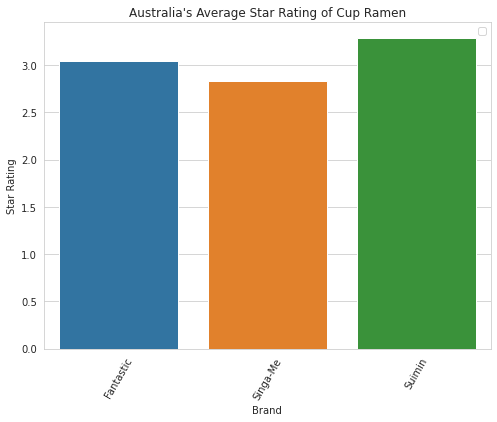

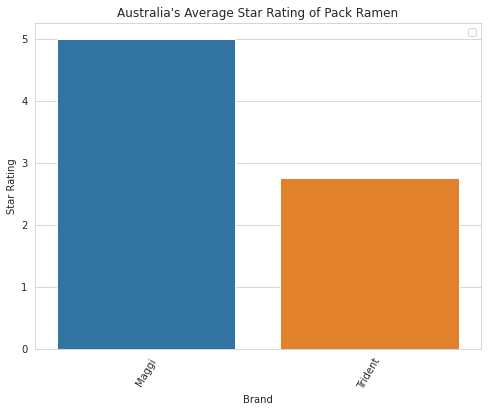

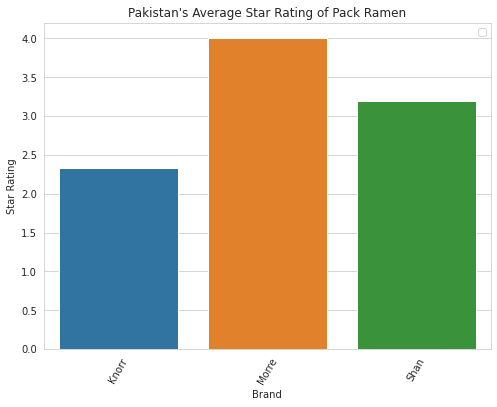

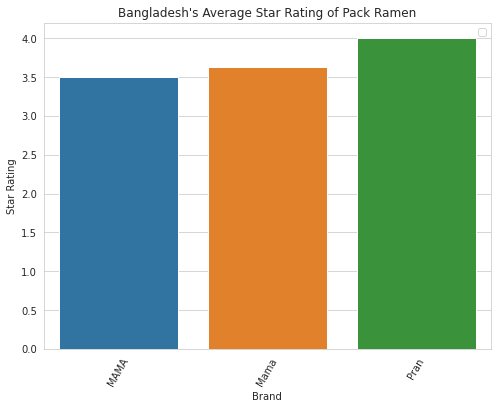

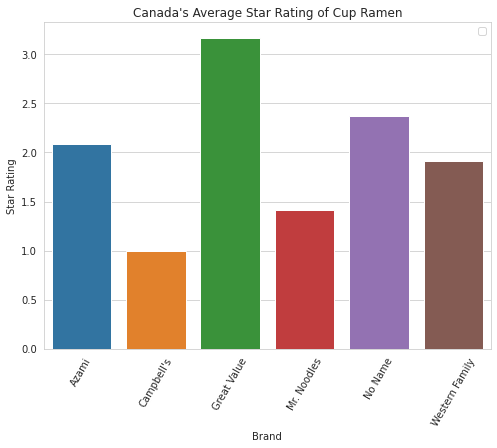

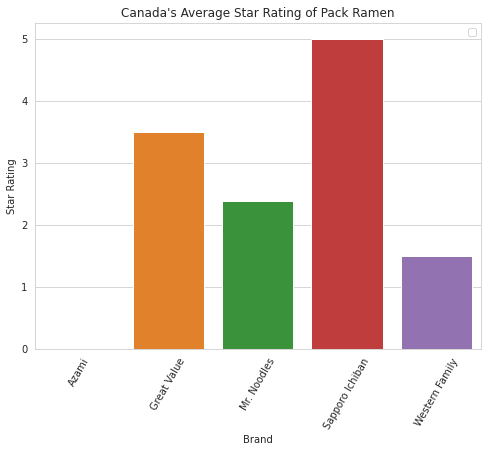

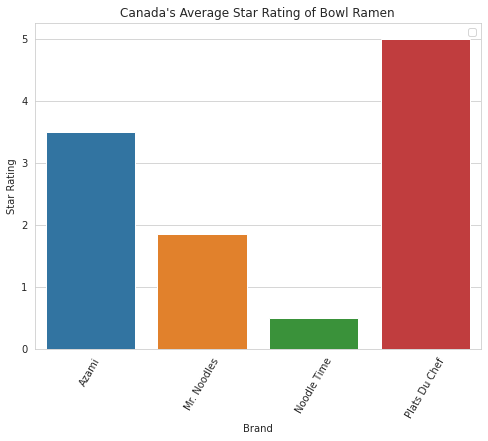

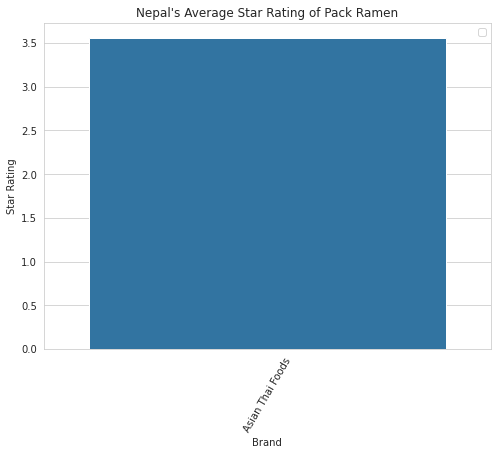

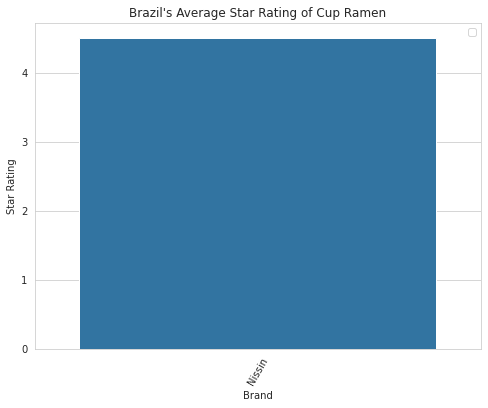

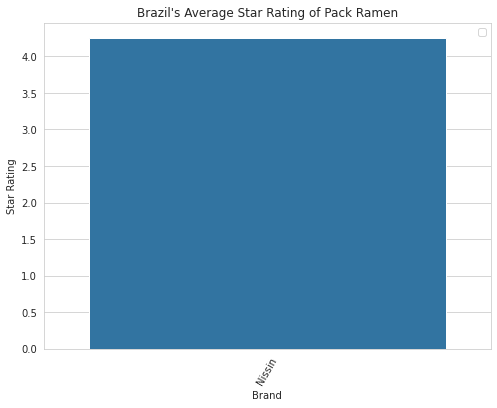

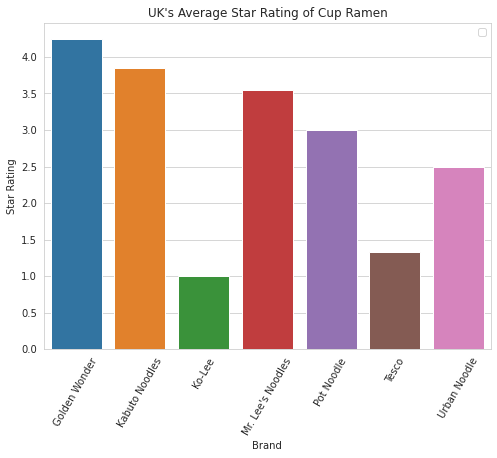

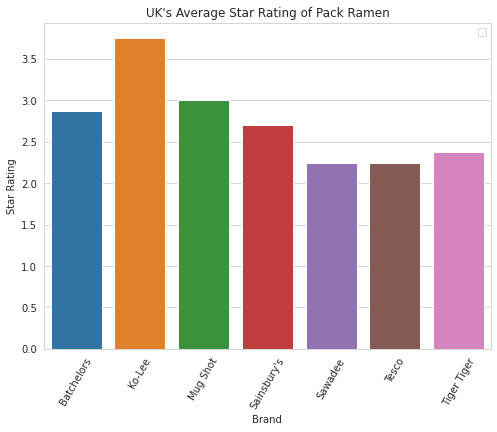

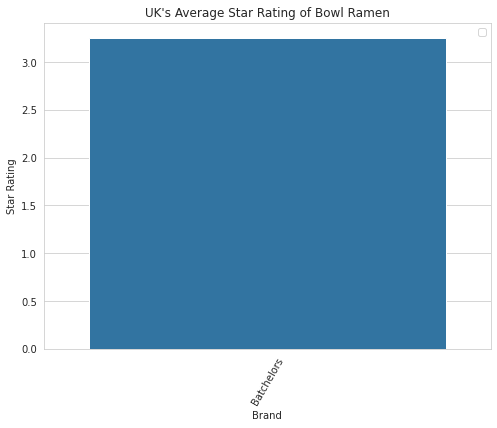

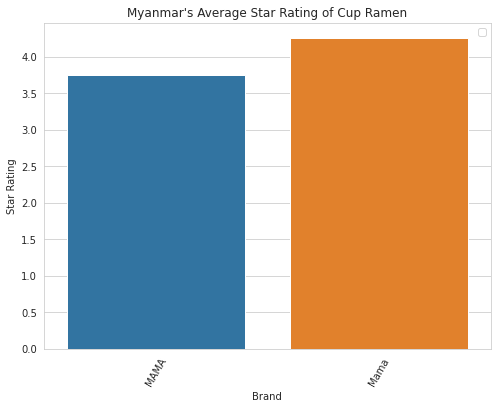

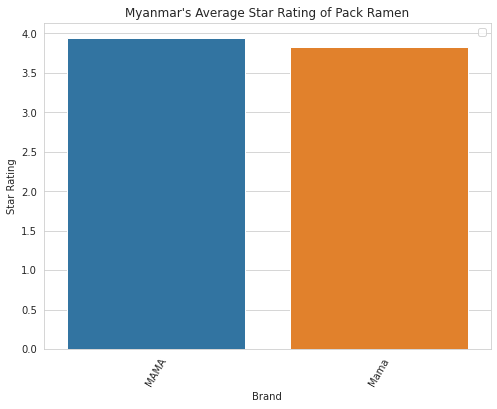

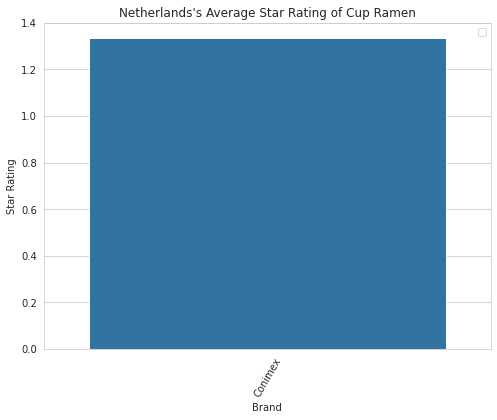

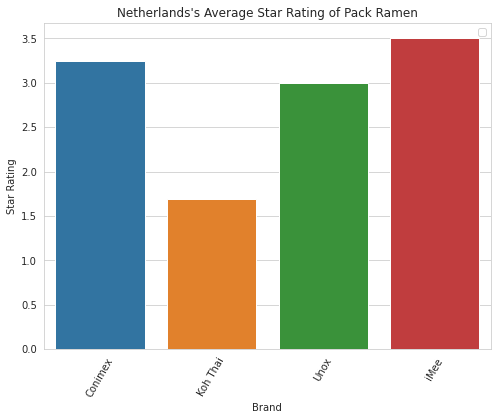

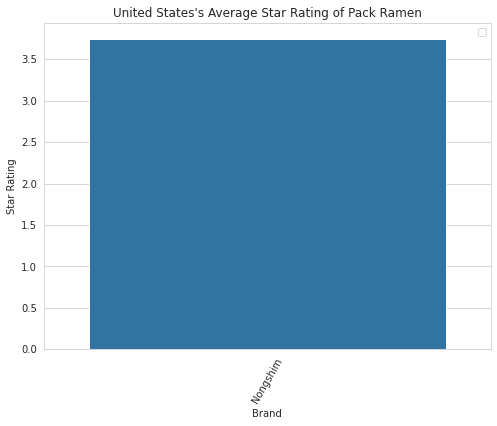

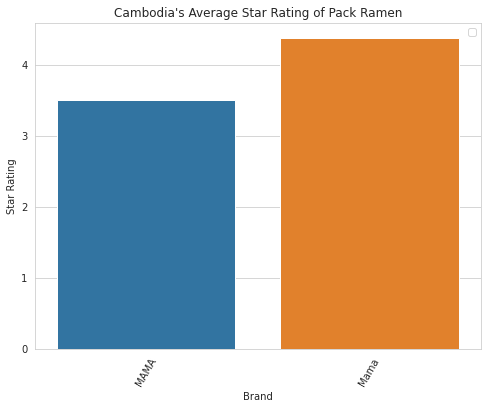

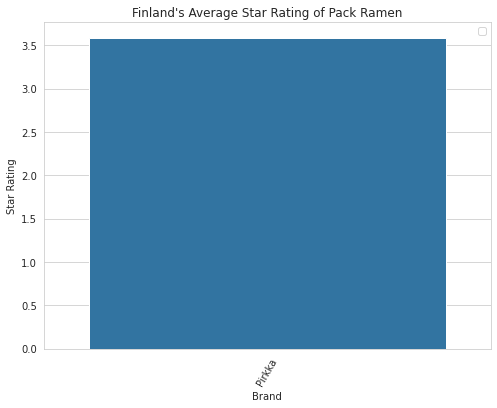

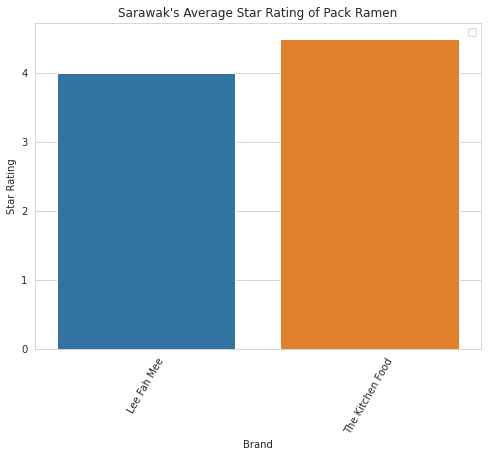

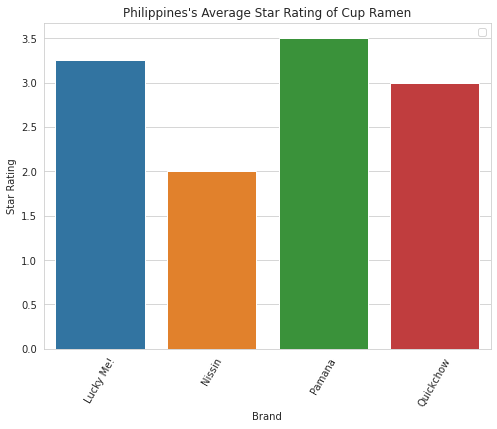

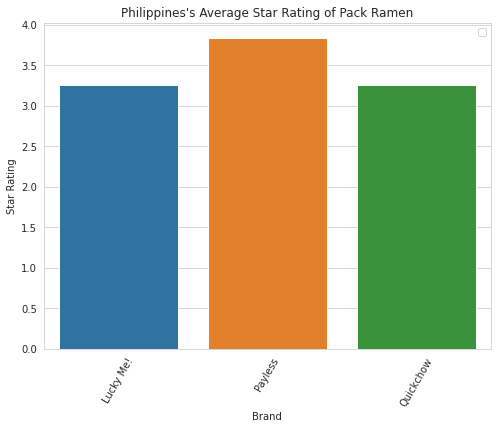

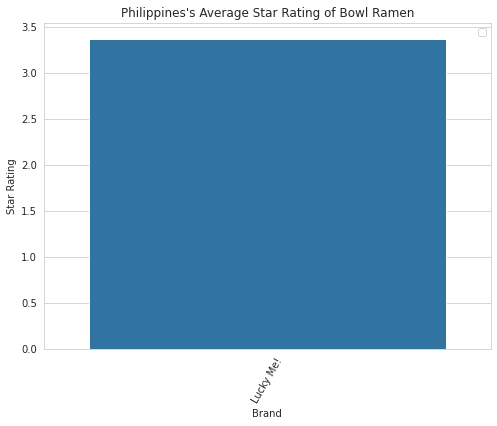

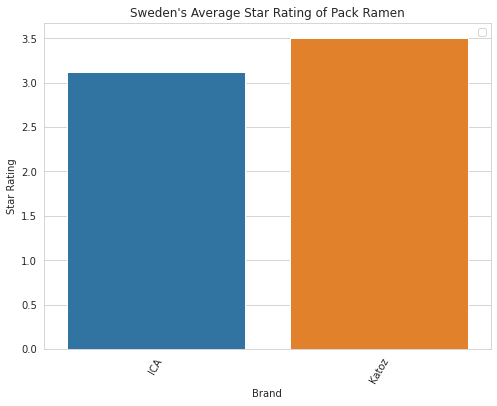

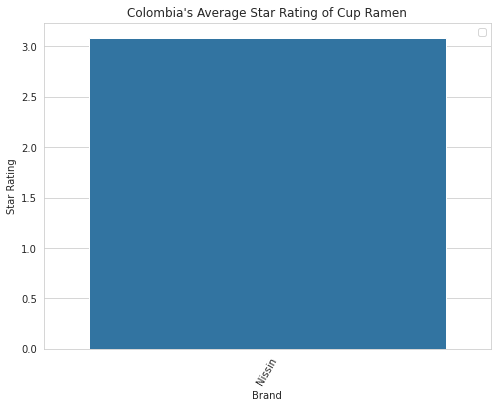

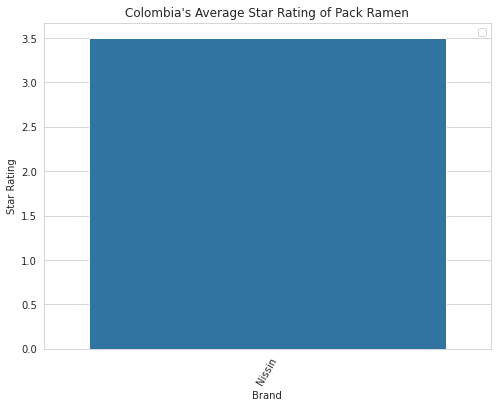

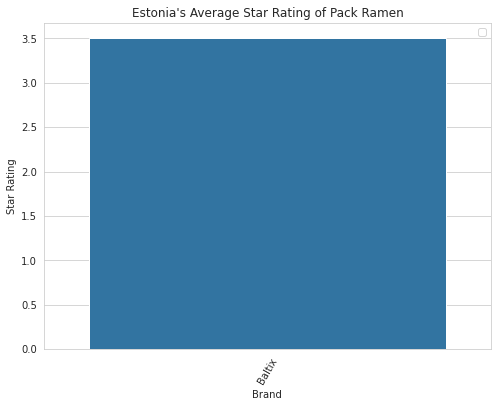

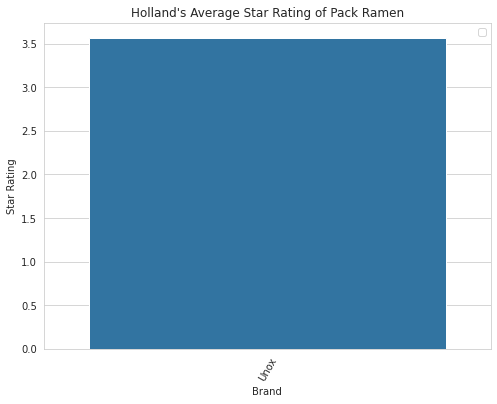

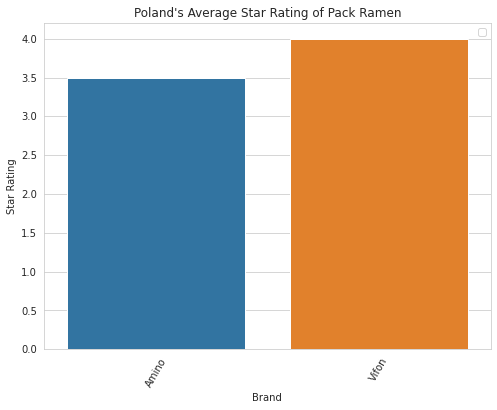

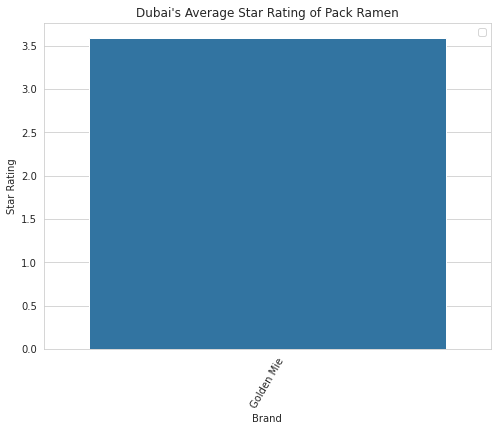

In [18]:
# Extracts data and loops through to produce 2 Series. One of Brands 
# and another of average ratings to plot a barplot.
def extract_info():

    data_wrangling()
    for country in list_of_countries:
        for style in list_of_styles:
            entry = data[(data.Country == country) & (data.Style == style)]       #dataframe
            
            brand_average_rating = entry.groupby('Brand').Stars.mean()            #Series
            sorted_brand_names = sorted(pd.Series(entry.Brand.unique()))          #Series
            
            if len(sorted_brand_names) > 0:                                       
                graph(country,style,sorted_brand_names,brand_average_rating)      
            else:                                                                 
                pass
    
extract_info()

# Closing Remarks:
#### Given you have read this far, simply put. Thank you. If this project helped you in anyway. Let me know! 
#### Drop a question or comment. I'd be more than happy to reply back. Happy Coding! 😎💻